## Exercise 2

In this exercise, we will plot COVID hospital admissions in the UK from March 2020 to February 2023, and you will fit an exponential curve to understand the rise in hospital admissions in a three week period from late December 2021 to early January 2022.   

 The data is in a file called `hospital_cases_2023-02-16.csv` (comma-separated-values format). It was downloaded from the official [website](https://coronavirus.data.gov.uk/) for UK COVID-19 data.


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


We will use `pandas`, a library for data analysis in Python to load and view the data. Pandas uses a structure called a _data frame_ to represent and manipulate data tables. All the required commands are included here, so you won't need to learn Pandas for this exercise. But if you are interested in learning more, [this](https://pandas.pydata.org/docs/) is a good place to start.

In [6]:
df_hosp = pd.read_csv('hospital_cases_2023-02-16.csv')  # Create a data frame by loading data from a csv file
df_hosp.head(3)   #display the first three rows

,date,hospitalCases
0,27/03/2020,7267
1,28/03/2020,8278
2,29/03/2020,9525


The command `pd.read_csv` loads the data onto a data frame. We have used the `.head()` command to display the top 3 rows of the data frame.

We can also display a random sample of rows from the data frame using `.sample()`, or the last few rows using `.tail()`.

In [7]:
df_hosp.tail(3)

,date,hospitalCases
1045,05/02/2023,7647
1046,06/02/2023,7795
1047,07/02/2023,7737


You can plot one column against another by just using their column names. Let us plot the `hospitalCases` column versus date.

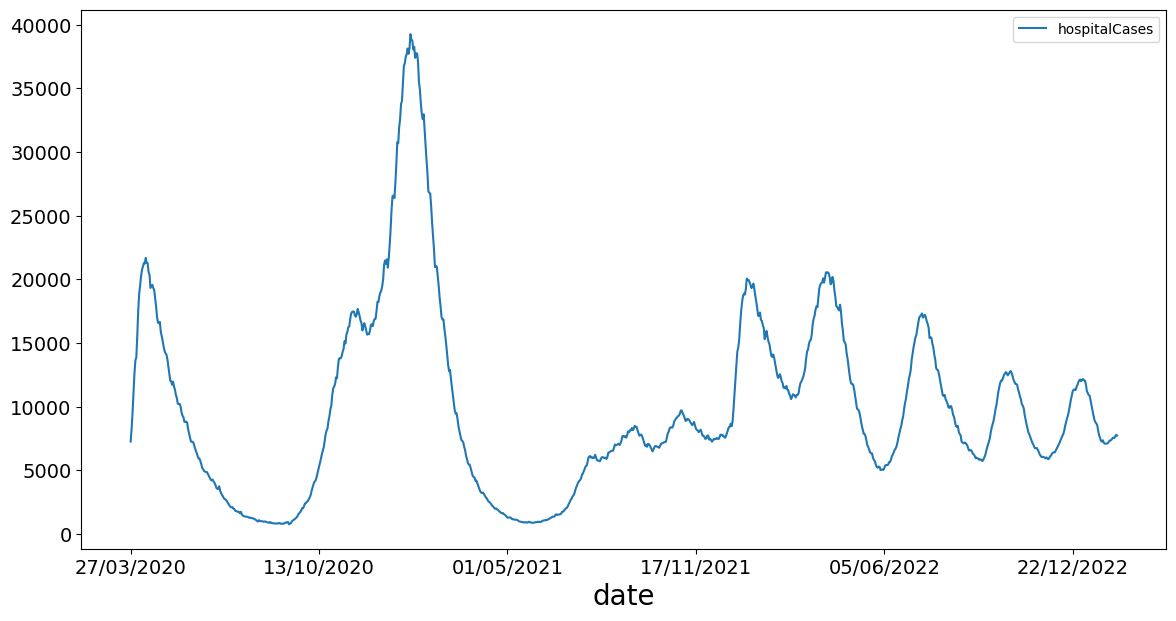

In [8]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

df_hosp.plot(x='date', y='hospitalCases')
plt.show()

Observe the sharp increase in hospital admissions corresponding to each wave; also notice that the peaks after mid-2021 are smaller (due to the vaccines). We now extract the rows spanning a three week period starting 22 December 2021 (when Omicron first spread in the UK) into a data frame called `df_part`

In [9]:
df_part = df_hosp[635:656]
df_part.head(2)

,date,hospitalCases
635,22/12/2021,8400
636,23/12/2021,8436


In [10]:
df_part.tail(2)

,date,hospitalCases
654,10/01/2022,20065
655,11/01/2022,19967


We now convert the `hospitalCases` column to a numpy array `yvals`

In [11]:
yvals = np.array(df_part['hospitalCases'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

## 2a) Plot the data `yvals` vs `xvals` in a scatterplot

Text(0.5, 1.0, 'Cases over Christmas 2021')

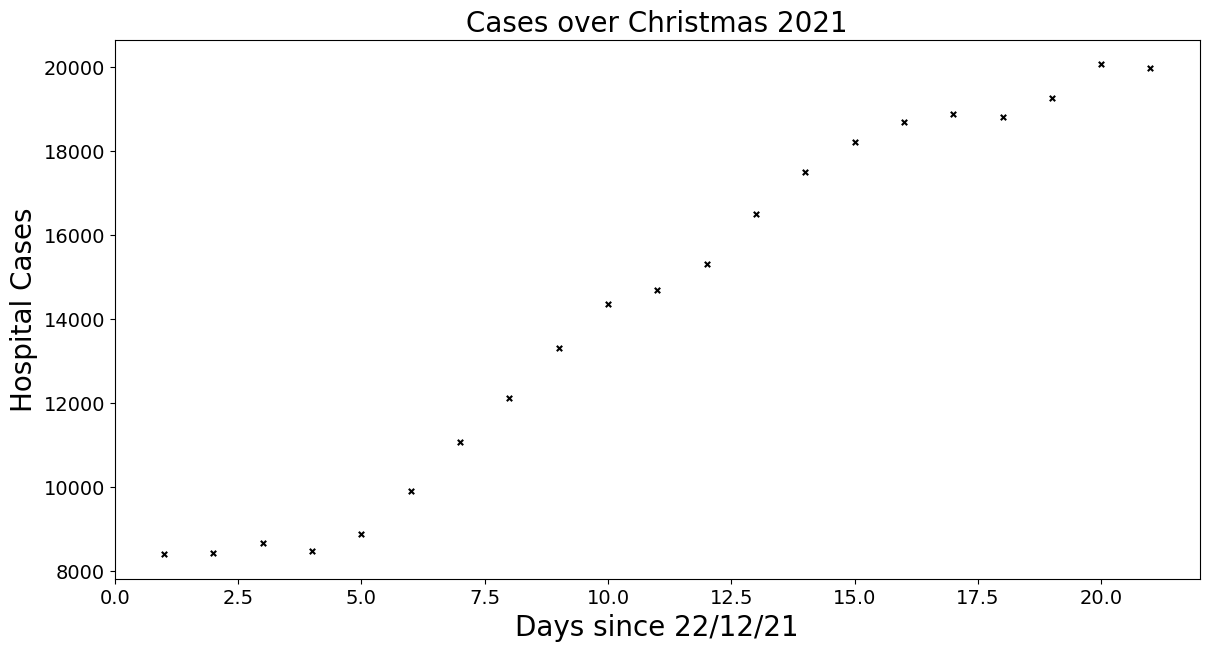

In [17]:

fig1, ax = plt.subplots(1,1)
ax.scatter(xvals, yvals,
           color='black', marker='x', s=15)
ax.set_xlabel('Days since 22/12/21')
ax.set_ylabel('Hospital Cases')
ax.set_title('Cases over Christmas 2021')

## 2b) Fit an exponential model to the data 

From our knowledge of how the virus spreads, we know that the number of infections, hospital admissions etc. should (roughly) follow an exponential curve. We would therefore like to fit a model of the form $y = c_1 e^{c_2 x}$, where $y$ is the number of admissions on day $x$. 

Note that this is a linear model on a log-scale for $y$. That is, $\log y = \log c_1 +  c_2 x$.

- Fit a linear model for $\log(\text{yvals})$ vs $\text{xvals}$, and print the values of $c_1$ and $c_2$
- Plot the fit $y = c_1 e^{c_2x}$ along with the scatterplot of the data

c1 = 7754.298
c2 = 0.052


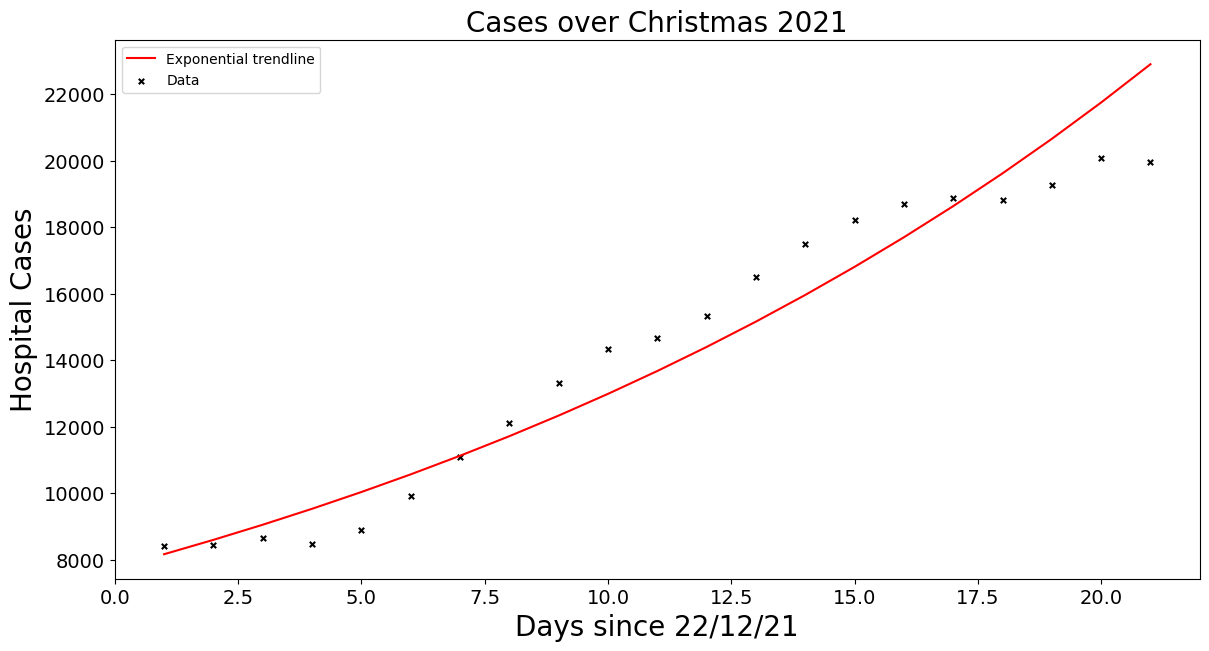

In [37]:
import pprint

def polyreg(data_matrix, k):
        
    xvals = data_matrix[:,0]
    yvals = data_matrix[:,1]
    
    Xk = np.column_stack(tuple([np.ones(xvals.shape)] + 
                               [xvals**i for i in range(1,k+1)]))
        
    beta_vec = np.linalg.lstsq(Xk, yvals)[0]
    fit = Xk.dot(beta_vec)
    residuals = yvals - fit
    
    return beta_vec, fit, residuals


fig2, ax = plt.subplots(1,1)

beta_vec, fit, residuals = polyreg(np.column_stack((np.array(xvals),
                                                    np.log(np.array(yvals)))),1)

c1 = np.exp(beta_vec[0])
c2 = beta_vec[1]
print(f'c1 = {np.round(c1,3)}\nc2 = {np.round(c2,3)}')

fitted = c1 * np.exp(c2 * xvals)

ax.plot(xvals, fitted, 
        color='r', label='Exponential trendline')
ax.scatter(xvals, yvals,
        color='black', marker='x', s=15,
        label='Data')

ax.set_xlabel('Days since 22/12/21')
ax.set_ylabel('Hospital Cases')
ax.set_title('Cases over Christmas 2021')
ax.legend()



## 2c) Estimate the weekly growth rate in hospital admissions (in \%) over this period

_Hint_ : According to the model, admissions increase every 7 days by a factor of 
$(c_1 e^{c_2 (x+7)})/(c_1 e^{c_2 x}) = e^{7c_2}$.

Text(0.5, 1.0, 'Rolling weekly growth rate with time')

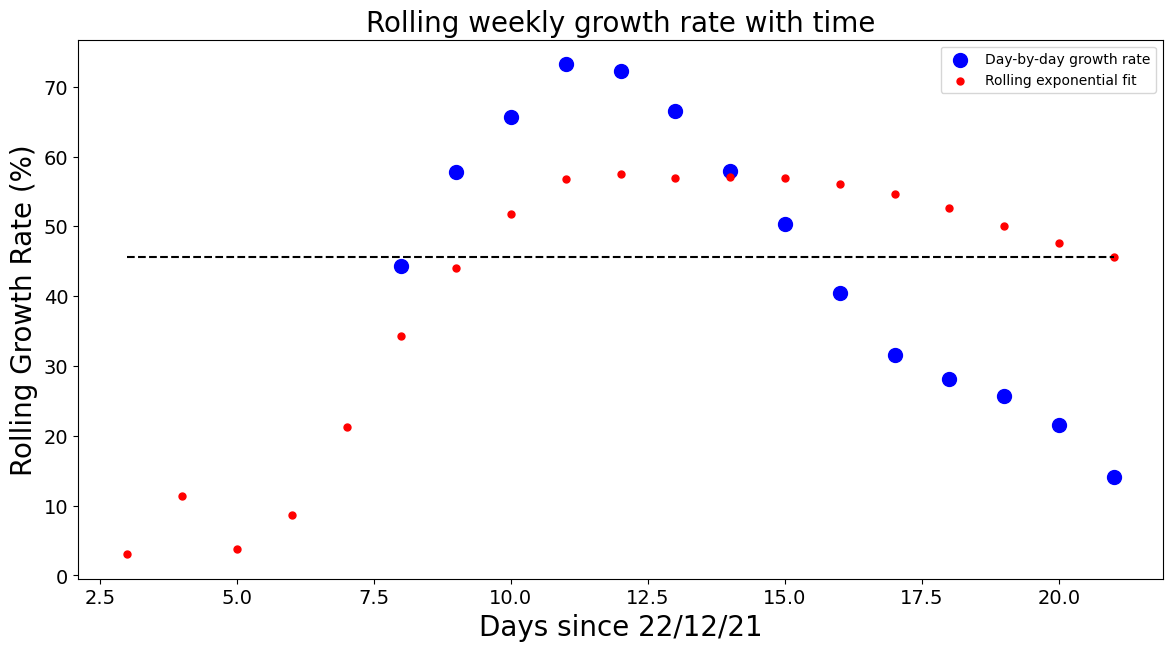

In [93]:
fig3, ax = plt.subplots(1,1)

c2s = np.array([polyreg(np.column_stack((np.array(xvals[0:i]), np.log(np.array(yvals[0:i])))),1)[0][1] for i in range(2,xvals.shape[0])])

rolling_growth_rate1 = (np.exp(7 * c2s) - 1) * 100
clipped_x1 = xvals[(xvals.shape[0] - c2s.shape[0]):]

y = yvals.tolist()
rolling_growth_rate2 = (np.array([y[i+7]/y[i] for i in range(0,len(y)-7)]) - 1 ) * 100
clipped_x2 = xvals[(xvals.shape[0] - rolling_growth_rate2.shape[0]):]

ax.scatter(clipped_x2, rolling_growth_rate2,
           color='blue', marker='o', s=100,
           label='Day-by-day growth rate')

ax.scatter(clipped_x1, rolling_growth_rate1,
           color='red', marker='o', s=25,
           label='Rolling exponential fit')

ax.plot([clipped_x1[0], clipped_x1[-1]], 
        [rolling_growth_rate1[-1],rolling_growth_rate1[-1]],
        color='black', linestyle='--')

ax.legend()
ax.set_xlabel('Days since 22/12/21')
ax.set_ylabel('Rolling Growth Rate (%)')
ax.set_title('Rolling weekly growth rate with time')
